In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.svm import NuSVC
print("imports complete")

imports complete


In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


First encode labels

In [4]:
exists = 'NaN' in data
exists
#no missing values

False

In [5]:
data_enc = data.copy()
data_enc = pd.get_dummies(data_enc,columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_first=True)
data_enc

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


Determine best model for this data - classification or regression (visualization), also complete feature scaling

C:\Users\kulka\OneDrive\Documents\Python_Class\Anaconda\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


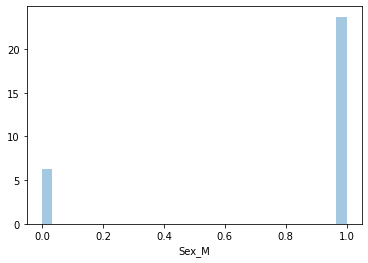

In [6]:
sns.distplot(data_enc['Sex_M'])

C:\Users\kulka\OneDrive\Documents\Python_Class\Anaconda\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


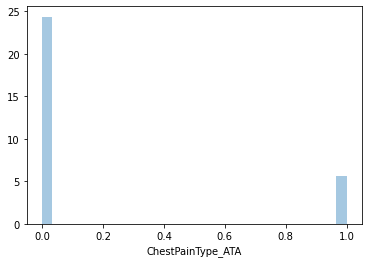

In [7]:
sns.distplot(data_enc['ChestPainType_ATA'])

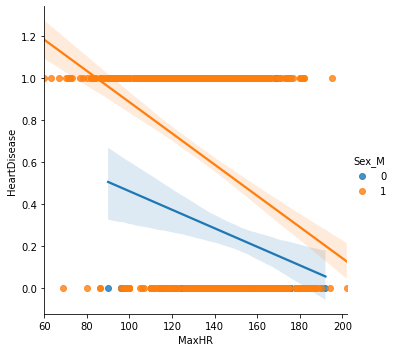

In [8]:
sns.lmplot(x='MaxHR',y='HeartDisease',data=data_enc,hue='Sex_M')

classification is best - there are distint lines and two distinct classes (heart disease is present or not present). For this, let's try feature scaling

In [9]:
X = data_enc.sample(frac=0.8, random_state=1)
test = data_enc.drop(X.index)

print(X.shape[0])
print(test.shape[0])
print(len(X)+len(test)) #should be 918; the number of rows of the total dataSet
X

734
184
918


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
900,58,114,318,0,140,4.4,1,1,0,0,0,0,1,0,0,0
570,56,128,223,0,119,2.0,1,1,0,0,0,0,1,1,0,0
791,51,140,298,0,122,4.2,1,1,0,0,0,1,0,1,1,0
189,53,180,285,0,120,1.5,1,1,0,0,0,0,1,1,1,0
372,63,185,0,0,98,0.0,1,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,35,120,198,0,130,1.6,1,1,0,0,0,1,0,1,1,0
717,49,130,269,0,163,0.0,0,0,0,0,0,1,0,0,0,1
646,66,160,228,0,138,2.3,0,1,0,0,0,0,0,0,0,1
628,61,134,234,0,145,2.6,1,1,0,0,1,1,0,0,1,0


In [10]:
X_again = X.copy()

In [11]:
test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
7,54,110,208,0,142,0.0,0,1,1,0,0,1,0,0,0,1
10,37,130,211,0,142,0.0,0,0,0,1,0,1,0,0,0,1
15,54,120,273,0,150,1.5,0,0,1,0,0,1,0,0,1,0
20,43,100,223,0,142,0.0,0,0,0,0,1,1,0,0,0,1
22,49,124,201,0,164,0.0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,56,120,240,0,169,0.0,0,1,1,0,0,1,0,0,0,0
905,67,152,212,0,150,0.8,1,1,0,1,0,0,0,0,1,0
908,63,140,187,0,144,4.0,1,1,0,0,0,0,0,1,0,1
909,63,124,197,0,136,0.0,1,0,0,0,0,1,0,1,1,0


In [12]:
y = X['HeartDisease']
X = X.drop(['HeartDisease'],axis=1)
X = X.to_numpy()
y = y.to_numpy()

test_answers = test['HeartDisease']
test = test.drop(['HeartDisease'],axis=1)
test_answers = test_answers.to_numpy()
test = test.to_numpy()

In [13]:
yCopy = y.copy()
XCopy = X.copy()
test_answers_copy = test_answers.copy()
testCopy = test.copy()

In [14]:
scaler_X = preprocessing.StandardScaler().fit(XCopy)
scaler_test_X = preprocessing.StandardScaler().fit(testCopy)

In [15]:
X = scaler_X.transform(XCopy)

In [16]:
test = scaler_test_X.transform(testCopy)

In [17]:
X

array([[ 0.47556194, -0.9668919 ,  1.09739583, ..., -0.81974495,
        -0.98646758, -0.87917396],
       [ 0.26304293, -0.22347393,  0.23045487, ...,  1.21989163,
        -0.98646758, -0.87917396],
       [-0.26825457,  0.41374147,  0.91488194, ...,  1.21989163,
         1.01371806, -0.87917396],
       ...,
       [ 1.32563794,  1.47576714,  0.27608334, ..., -0.81974495,
        -0.98646758,  1.13743132],
       [ 0.79434044,  0.09513377,  0.3308375 , ..., -0.81974495,
         1.01371806, -0.87917396],
       [ 0.26304293, -0.11727136,  0.71411667, ...,  1.21989163,
        -0.98646758,  1.13743132]])

In [18]:
y

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [19]:
test

array([[ 0.05725022, -1.3525601 ,  0.04621295, ..., -0.83887049,
        -1.06748999,  1.20554275],
       [-1.73353677, -0.18387704,  0.07394073, ..., -0.83887049,
        -1.06748999,  1.20554275],
       [ 0.05725022, -0.76821857,  0.64698135, ..., -0.83887049,
         0.93677693, -0.8295019 ],
       ...,
       [ 1.00531393,  0.4004645 , -0.14788145, ...,  1.19207912,
        -1.06748999,  1.20554275],
       [ 1.00531393, -0.53448196, -0.05545554, ...,  1.19207912,
         0.93677693, -0.8295019 ],
       [ 0.58395228,  1.80288417, -0.24954995, ..., -0.83887049,
         0.93677693, -0.8295019 ]])

In [20]:
test_answers

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [21]:
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [22]:
 test_pred = neigh.predict(test)

In [23]:
test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [24]:
num_right = 0
num_wrong = 0
for i in range(len(test_pred)):
    if test_pred[i] == test_answers[i]:
        num_right += 1
    else:
        num_wrong += 1
    i+=1
    
    
accuracy = (num_right/(num_wrong+num_right)) *100
print(accuracy)

    

85.86956521739131


Let's visualize the data more to understand what is going on

In [25]:
data_cols = data_enc.columns
data_cols = np.delete(data_cols,6)
data_cols

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [26]:
new_df = pd.DataFrame(X,columns = data_cols)
new_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.475562,-0.966892,1.097396,-0.555318,0.143796,3.503788,0.511046,-0.487621,-0.532181,-0.230401,-1.237350,2.024160,-0.819745,-0.986468,-0.879174
1,0.263043,-0.223474,0.230455,-0.555318,-0.678031,1.143364,0.511046,-0.487621,-0.532181,-0.230401,-1.237350,2.024160,1.219892,-0.986468,-0.879174
2,-0.268255,0.413741,0.914882,-0.555318,-0.560627,3.307086,0.511046,-0.487621,-0.532181,-0.230401,0.808179,-0.494032,1.219892,1.013718,-0.879174
3,-0.055736,2.537793,0.796248,-0.555318,-0.638896,0.651609,0.511046,-0.487621,-0.532181,-0.230401,-1.237350,2.024160,1.219892,1.013718,-0.879174
4,1.006859,2.803299,-1.804575,-0.555318,-1.499858,-0.823656,0.511046,-0.487621,-0.532181,-0.230401,0.808179,-0.494032,1.219892,-0.986468,1.137431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,-1.968407,-0.648284,0.002313,-0.555318,-0.247550,0.749960,0.511046,-0.487621,-0.532181,-0.230401,0.808179,-0.494032,1.219892,1.013718,-0.879174
730,-0.480774,-0.117271,0.650237,-0.555318,1.043892,-0.823656,-1.956770,-0.487621,-0.532181,-0.230401,0.808179,-0.494032,-0.819745,-0.986468,1.137431
731,1.325638,1.475767,0.276083,-0.555318,0.065526,1.438417,0.511046,-0.487621,-0.532181,-0.230401,-1.237350,-0.494032,-0.819745,-0.986468,1.137431
732,0.794340,0.095134,0.330838,-0.555318,0.339469,1.733470,0.511046,-0.487621,-0.532181,4.340258,0.808179,-0.494032,-0.819745,1.013718,-0.879174


In [27]:
pca = PCA(n_components = 2)
pC = pca.fit_transform(new_df)
initial = pd.DataFrame(pC, columns = ['P1','P2']) #P1 and P2 stand for the first and second components found from PCA
initial

,P1,P2
0,-1.244462,1.230419
1,-1.681613,1.438305
2,-2.270468,-2.198857
3,-2.517796,1.157086
4,-0.683705,0.379300
...,...,...
729,-0.862289,-2.193478
730,2.464417,-0.442004
731,-0.040960,1.076264
732,-1.019374,-1.056190


In [28]:
heartDisease = pd.DataFrame(y,columns=['heartdisease'])

In [29]:
heartDisease['heartdisease'] = heartDisease['heartdisease'].replace([1],'present')
heartDisease['heartdisease'] = heartDisease['heartdisease'].replace([0],'not_present')
heartDisease

,heartdisease
0,present
1,present
2,present
3,present
4,present
...,...
729,present
730,not_present
731,not_present
732,present


In [30]:
pca_df = pd.concat([initial,heartDisease],axis=1)
pca_df

,P1,P2,heartdisease
0,-1.244462,1.230419,present
1,-1.681613,1.438305,present
2,-2.270468,-2.198857,present
3,-2.517796,1.157086,present
4,-0.683705,0.379300,present
...,...,...,...
729,-0.862289,-2.193478,present
730,2.464417,-0.442004,not_present
731,-0.040960,1.076264,not_present
732,-1.019374,-1.056190,present


In [31]:

pca_df

,P1,P2,heartdisease
0,-1.244462,1.230419,present
1,-1.681613,1.438305,present
2,-2.270468,-2.198857,present
3,-2.517796,1.157086,present
4,-0.683705,0.379300,present
...,...,...,...
729,-0.862289,-2.193478,present
730,2.464417,-0.442004,not_present
731,-0.040960,1.076264,not_present
732,-1.019374,-1.056190,present


(-3.0, 4.0)

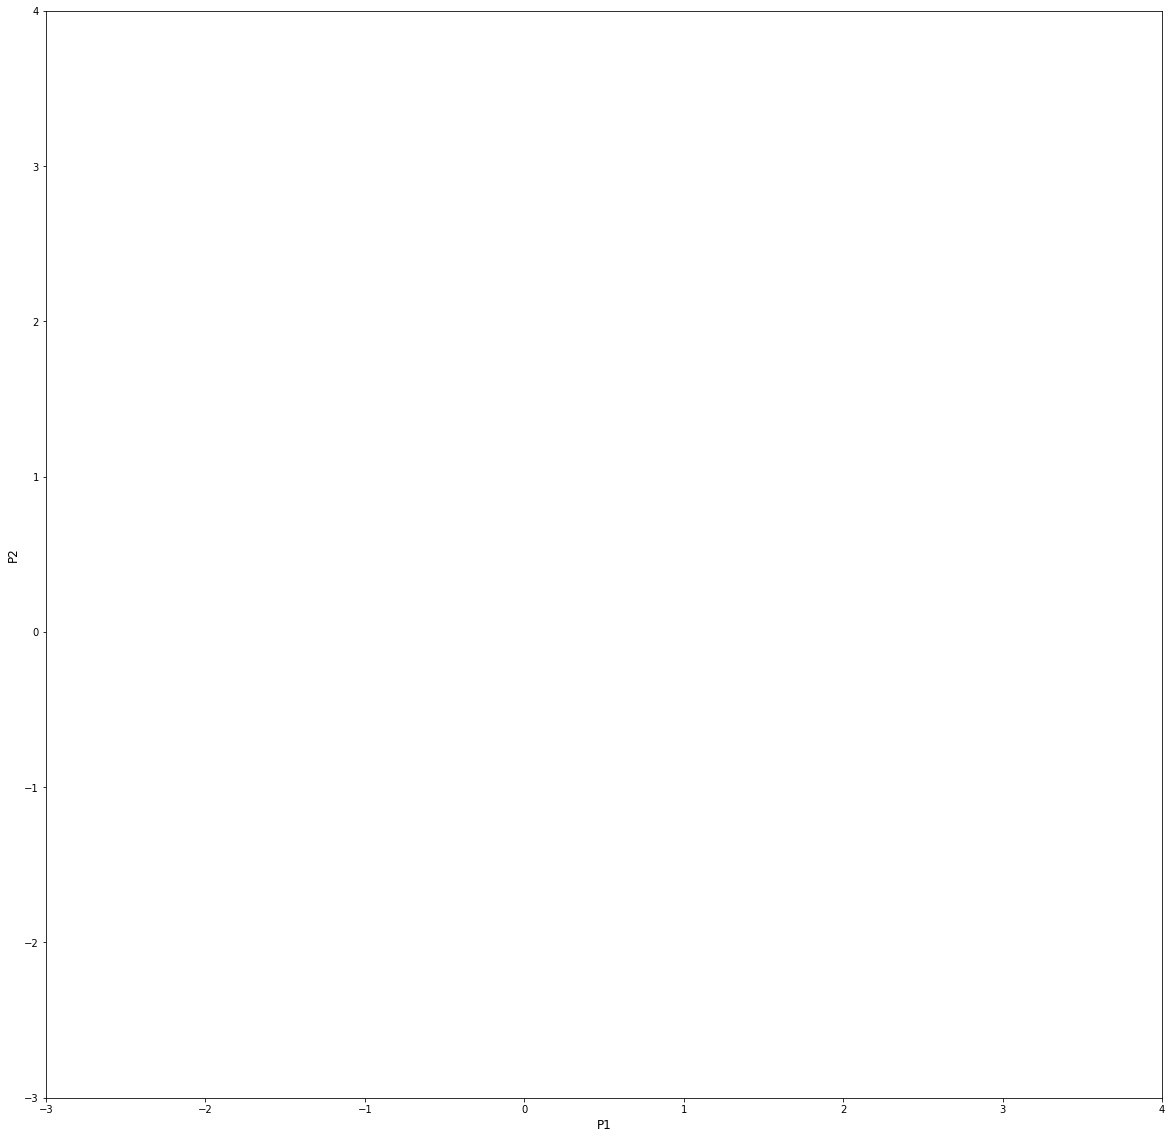

In [32]:
#making the plot of the data
plot = plt.figure(figsize=(20,20))
ax = plot.add_subplot(1,1,1)
ax.set_xlabel("P1",fontsize=12)
ax.set_ylabel("P2",fontsize=12)
plt.xlim(-3, 4)
plt.ylim(-3,4)


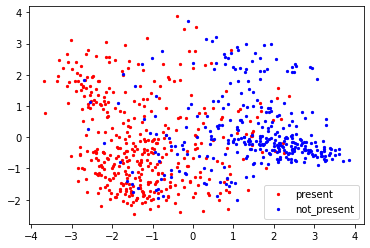

In [33]:
targets = ['present','not_present']
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = heartDisease['heartdisease'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'P1']
               , pca_df.loc[indicesToKeep, 'P2'], c = color, s = 5)

plt.legend(targets,prop={'size': 10})

The above graph shows the relationship between the data is severely non-linear

In [39]:
clf = make_pipeline(preprocessing.StandardScaler(), NuSVC())
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('nusvc', NuSVC())])

In [41]:
test_pred_svm=clf.predict(test)
test_pred_svm

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [42]:
clf.score(X,y)

0.8841961852861036

In [45]:
svm_params = clf.get_params()
svm_params

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('nusvc', NuSVC())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'nusvc': NuSVC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'nusvc__break_ties': False,
 'nusvc__cache_size': 200,
 'nusvc__class_weight': None,
 'nusvc__coef0': 0.0,
 'nusvc__decision_function_shape': 'ovr',
 'nusvc__degree': 3,
 'nusvc__gamma': 'scale',
 'nusvc__kernel': 'rbf',
 'nusvc__max_iter': -1,
 'nusvc__nu': 0.5,
 'nusvc__probability': False,
 'nusvc__random_state': None,
 'nusvc__shrinking': True,
 'nusvc__tol': 0.001,
 'nusvc__verbose': False}

In [46]:
clf.decision_function(X)

array([ 0.77300001,  1.00062536,  1.28965275,  1.13116905,  0.34556118,
       -0.85727154,  0.53205394, -0.85447828, -1.35665753,  0.31585472,
       -1.23242968,  0.21410673,  0.52347659,  0.98988997,  0.83928724,
       -0.99993897,  1.33901622, -1.22132748,  1.38443333,  1.00000683,
        0.74538441, -1.54730878,  1.24761986, -1.50700876,  0.85714788,
        0.9829583 , -1.00003615,  0.81658612,  0.99997987, -1.24260649,
       -1.17734425, -0.42967096, -0.48990786, -1.48433735,  1.05841954,
        1.38278435,  1.40249635,  1.41844249, -1.44504991, -0.20780211,
        1.03558346,  0.80710307,  1.33244536, -0.99994721, -1.37889112,
       -0.96437592,  1.13410796, -0.91163507, -1.19951866,  1.00003047,
       -0.91820652,  0.99994125,  1.38167538, -1.08120515,  0.2984528 ,
       -1.00002089,  1.1307788 , -0.9041422 ,  0.55317675, -0.56761625,
        1.27313372,  0.90026157,  0.15088879,  0.19508392, -1.00005847,
        1.13348824,  1.40077027,  1.18062604, -0.8222215 ,  1.00